#__Lab 03 - Image Transformation__

Image Transformation is used to capture the intensity distribution of the pixels in an image. Any transformation uses a set of basis images; whose dot product with the original image provide the transform coefficients. The number of basis images and the size of the basis image is same as that of the original dimension of the image.  

Fourier Transform uses sine and cosine components for construction of basis image. The following equations provide the forward and inverse transformation of the image using Fourier Transform.

The basis image is provided by e(-2*pi*i(ux/M + vy/N)) where M and N denote the number of rows and columns in the original image  

![DFT.png](DFT.png)

Fourier has two sets of basis images(Cosine and Sine) as the transform involves complex number

## __Generation of Basis Images__

The following line of code generate Cosine basis image used to find coefficient at location (1,7) for an image of size (8,8)

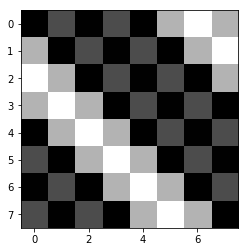

In [143]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
u = 1
v = 7
a = np.zeros((8,8))
for x in range(0,8):
    for y in range(0,8):
        a[x][y] = math.sin(2*math.pi*((x*u)/8 + (y*v)/8))

a = a*255
a =a.astype(np.uint8)
plt.imshow(a,cmap='gray',vmin=0,vmax=255)
plt.show()

Extend the above code , generate both the set of basis images and display it in the grid layout as shown below
The following representation is based on optical layout of DFT

![Basis.png](Basis.png)

## __Understanding the Transform Coefficients__

Transform coefficients are obtained using dot product of image with the basis images. Fourier coefficients are complex in nature; it has both the real(cosine) and imaginary(sine) component. Hence,cannot be viewed directly. Its magnitude can be used for representation which is 

Square root (real^2 + imaginary^2) 

But , this will result in larger value. It is a usual practice to take logarithm of fourier coefficient log(1+|F(u,v)|) and map the resulting value between 0 to 255.he display of the magnitude of the Fourier transform is called as the spectrum of the transform.

__What is F(0,0) in standard representation of DFT ? Note: F(0,0) in standard representation is known as DC -coefficient__

The following section of code computes DFT for a sample image , converts to optical layout and displays the same

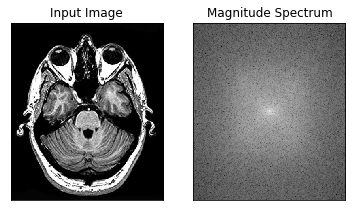

In [150]:
import cv2
from skimage.io import imread
import numpy as np
from matplotlib import pyplot as plt

img = imread('mri.jpg')
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()          

__Exercise__ 

1. Suppose you take a constant matrix in which all the pixels take the same gray level. The DFT will contain DC coefficient and Zeroes elsewhere
2. Now consider the image with single corrugation across the rows as shown below, How many coefficients in the resulting spectrum take non-zero values? Why so?

![if5V03.png](if5V03.png)

## __Phase Spectrum of DFT__

Phase spectrum preserves spatial locations

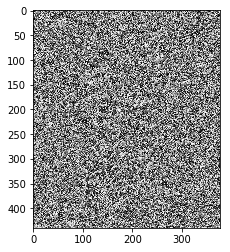

In [166]:
phase = np.arctan(f.imag/f.real)
plt.imshow(phase, cmap = 'gray')

## __Application of DFT__

Filtering benefits from Transformations. Since the transforms capture intensity variations; It is possible to identify the high frequency components (edges) from low frquency components (smooth surfaces).

If the coefficients in the resulting transform image are modified, then on inverse transformation visible modification will be seen.
In the following code, the low frequency coefficients are filtered

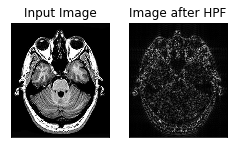

In [172]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

img = imread('mri.jpg')
# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2
crow = int(crow)
ccol = int(ccol)
# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()


## __Final Report__

A detailed study on Fourier Transforms to be performed. In addition to two exercise questions, following questions are to be explored
3. Identify the working of buttterworth filter and apply it on the transform domain and study its effectiveness
4. What is the difference between the magnitude spectrum of original image and its rotated version? 